<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br /><br>M. Sc. Carsten Bauer</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Vorlesung &mdash; Programmiertechniken 4</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2019</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2019-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2019-CompPhys.shtml)

# 0. Erinnerung letzte Woche

## Funktionen (cont'd)

In [ ]:
function myfunc(x)
    a = 1 + x
    b = a^2
    c = b - 3
    
    return c
end

In [ ]:
myfunc(3)

In [ ]:
function myfunc2(x)
    a = 1 + x
    b = a^2
    c = b - 3
    
    return a, b, c
end

In [ ]:
result = myfunc2(3)

In [ ]:
result[1]

In [ ]:
result[3]

In [ ]:
a, b, c = myfunc2(3)

In [ ]:
x = rand(1:10, 10)

In [ ]:
issorted(x)

In [ ]:
sort(x)

In [ ]:
x

In [ ]:
sort!(x)

In [ ]:
x

## Selbst sortieren: BubbleSort

In [1]:
function swap!(a, i, j) # Das Ausrufezeichen ! zeigt an, dass das Array `a` modifiziert wird.
    tmp = a[i]
    a[i] = a[j]
    a[j] = tmp
    return a
end

swap! (generic function with 1 method)

In [2]:
function bubblesort!(a)
    for rechts in length(a):-1:2 # N, N-1, N-2, ... , 3, 2
        
        # bubble-Schritt
        for i in 1:rechts-1
            if a[i]>a[i+1]
                swap!(a, i, i+1)
            end
        end
    end
    
    return a
end

bubblesort! (generic function with 1 method)

## Visualisierung

In [ ]:
using PyPlot, Random

function show_bubble_schritt(n)
    a = shuffle(1:n)
    
    pygui(true)
    fig = figure()
    title("Bubble-Schritt")
    for rechts = length(a):-1:length(a)
        # bubble-Schritt
        for i in 1:rechts-1
            if a[i]>a[i+1]
                swap!(a, i, i+1)
            end
            fig.clear()
            bar(1:length(a), a)
            m, mind = findmax(a)
            bar(mind, m, color="red")
            sleep(0.001)
        end
    end
    pygui(false)
    nothing
end

function show_bubble_sort(n)
    a = shuffle(1:n)
    
    pygui(true)
    fig = figure()
    title("Bubble-Sort")
    for rechts = length(a):-1:2
        # bubble-Schritt
        for i in 1:rechts-1
            if a[i]>a[i+1]
                swap!(a, i, i+1)
            end
        end
        fig.clear()
        bar(1:length(a), a)
        m, mind = findmax(a[1:rechts])
        bar(mind, m, color="red")
        sleep(0.001)
    end
    pygui(false)
    nothing
end

In [ ]:
show_bubble_schritt(40)

In [ ]:
show_bubble_sort(40)

# 1. BubbleSort: Timing und Komplexität

In [3]:
b = rand(50000);

In [4]:
@time bubblesort!(b)

  4.137338 seconds (26.29 k allocations: 1.329 MiB)


50000-element Array{Float64,1}:
 2.5080783239372906e-5 
 3.2776914591581274e-5 
 5.295672455329914e-5  
 6.820985974376192e-5  
 6.851168759047788e-5  
 7.687069949868786e-5  
 9.148805617309463e-5  
 0.00010813920627295026
 0.00012213828514529013
 0.00014182310972787882
 0.000190194226934004  
 0.00020578882943267374
 0.00026360704956718273
 ⋮                     
 0.9997877789249197    
 0.9998151753780931    
 0.9998172489253081    
 0.9998327416183499    
 0.9998617258278741    
 0.9998889452406128    
 0.9998976711968157    
 0.999910760188299     
 0.999916158203872     
 0.999980130777425     
 0.9999937488338497    
 0.9999953482015442    

In [5]:
@elapsed bubblesort!(b)

1.437035999

In [6]:
function benchmark_bubblesort()
    number_count = [0.0]
    elapsed_time = [0.0]

    for i in 1:16
        b = rand(2^i)
        t = @elapsed bubblesort!(b)
        println(2^i, "\t", t)
        push!(number_count, 2^i)
        push!(elapsed_time, t)
    end
    
    return number_count, elapsed_time
end

benchmark_bubblesort (generic function with 1 method)

In [7]:
number_count, elapsed_time = benchmark_bubblesort();

2	2.99e-7
4	4.0e-7
8	3.0e-7
16	8.0e-7
32	1.999e-6
64	1.9e-5
128	2.33e-5
256	9.39e-5
512	0.0003618
1024	0.0011735
2048	0.003357501
4096	0.0162342
8192	0.0933696
16384	0.4163092
32768	1.8413772
65536	7.253109401


In [8]:
using PyPlot

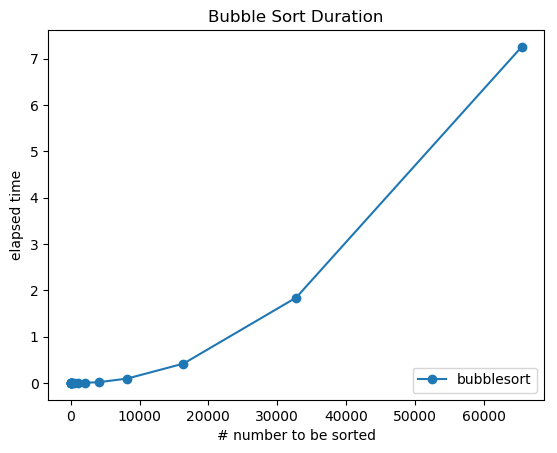

PyObject Text(0.5, 1.0, 'Bubble Sort Duration')

In [9]:
plot(number_count, elapsed_time, marker="o", label="bubblesort");
legend(loc=4);
xlabel("# number to be sorted");
ylabel("elapsed time");
title("Bubble Sort Duration")

### Exponenten extrahieren

In [ ]:
] add Polynomials

In [10]:
using Polynomials

In [11]:
# fit straight line in loglog space (ignoring first couple of datapoints)
# syntax: polyfit(x, y, degree)
p = polyfit(log.(number_count[7:end]), log.(elapsed_time[7:end]), 1)
m = p.a[2]

1.9449790369163962

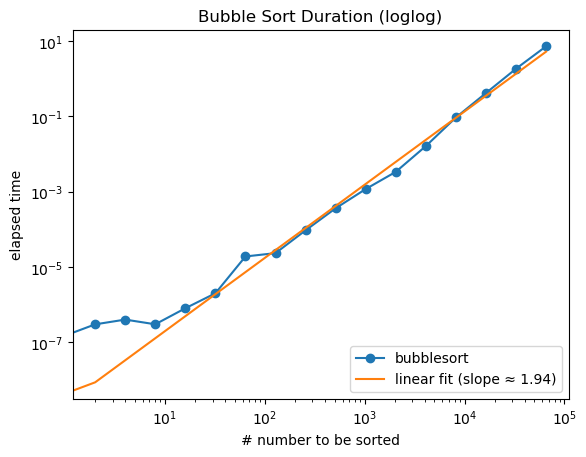

In [12]:
plot(number_count, elapsed_time, marker="o", label="bubblesort");
plot(number_count, exp.(p.(log.(number_count))), label="linear fit (slope ≈ $(round(m, digits=2)))")
legend(loc=4);
xscale("log")
yscale("log")
xlabel("# number to be sorted");
ylabel("elapsed time");
title("Bubble Sort Duration (loglog)");

## Komplexität (asymptotische Skalierung): BubbleSort $\in \mathcal{O}(n^2)$

O-Notation: https://de.wikipedia.org/wiki/Landau-Symbole#Beispiele_und_Notation

**Hinweis:** Die Macros `@time` und `@elapsed` sind hilfreich, sollten jedoch meistens vermieden werden, da Nebeneffekte das Messergebnis verzerren können. Führen Sie beispielsweise `@time sort(rand(1000));` zweimal aus und beobachten Sie, wie sich das Ergebnis ändert.

Es ist stattdessen empfehlenswert auf `@btime` und `@belapsed` aus dem Paket [BenchmarkTools.jl](https://github.com/JuliaCI/BenchmarkTools.jl) verwenden.

In [46]:
@time sort(rand(1000))

  0.009080 seconds (6.01 k allocations: 335.917 KiB)


1000-element Array{Float64,1}:
 0.001864437008099351
 0.006451936797210456
 0.007942927544941192
 0.008276966760733195
 0.008348192521164144
 0.009843574459912352
 0.01090254593971074 
 0.011649210493729578
 0.012028332958457622
 0.012675761146512698
 0.014371013658937892
 0.014493519094455065
 0.014921332456080183
 ⋮                   
 0.9820439203052729  
 0.9833747593189508  
 0.9834500875350902  
 0.986593846829644   
 0.9879695728771314  
 0.9886620869242737  
 0.99200964545472    
 0.9930914251134721  
 0.9957816323356532  
 0.9969320133432358  
 0.9992955076230376  
 0.9997824458162705  

In [68]:
@time sort(rand(1000))


  0.000071 seconds (6 allocations: 16.031 KiB)


1000-element Array{Float64,1}:
 0.00013299138981714975
 0.002669324517655225  
 0.002984572310187783  
 0.003151665671909276  
 0.003920705235302746  
 0.0045366207062340624 
 0.005648629322552612  
 0.005846214409235939  
 0.006471501538294788  
 0.007176670966885679  
 0.007579738044851014  
 0.009373677141798042  
 0.009536573574773222  
 ⋮                     
 0.9890783438637645    
 0.9890844362819071    
 0.9903665894990081    
 0.9909946422569207    
 0.9910465633810281    
 0.9936198053815499    
 0.9940780517363481    
 0.9942050993196201    
 0.994326750580732     
 0.9984209643459303    
 0.9987495565300366    
 0.9989159974448751    

# 2. Experimentelle Daten verarbeiten

Wir werden ein paar externe Pakete verwenden, die wir an dieser Stelle installieren wollen.

In [ ]:
] add CSVFiles ExcelFiles DataFrames Measurements LsqFit

In [69]:
using CSVFiles, ExcelFiles, DataFrames, Measurements, LsqFit

## Beschreibung des (Gedanken-)Experiments

Im Folgenden wollen wir erarbeiten, wie man experimentelle Daten, die zum Beispiel während eines Praktikumsversuchs gewonnen wurden, mit Julia verarbeiten kann. Ein im Grundstudium häufig durchgeführtes Experiment ist das [Pohlsche Rad](https://de.wikipedia.org/wiki/Pohlsches_Rad) als Beispiel für resonante und chaotische Schwingvorgänge.

Daran angelehnt betrachten wir die folgende Differentialgleichung eines **getriebenen, gedämpften Oszillators**,

$\quad m\ddot{x} + \gamma\dot{x}+kx = F\sin(\omega t).$

### Wir machen zwei Versuche:

1. Wir schalten Dämpfung und Triebkraft aus ($\gamma = 0, F = 0$) und bestimmen die Masse $m$ und Schwingungsperiode $T$ des freien Oszillators.
2. Wir treiben den gedämpften Oszillator mit der konstanten Kraft $F$ bei variierenden Frequenzen $\omega$ und messen die Amplitude $A$ der Oszillation.

Aus den Ergebnissen zu 1 können wir die Federkonstante $k$ berechnen.

Aus den Ergebnissen zu 2 können wir die Dämpfung $\gamma$ bestimmen.

### "Messdaten" herunterladen:

**CSV Datei** ("Comma-separated values") mit Daten der Massen- und **Periodenmessung** (Versuch 1): https://tinyurl.com/y3bbrklk

**Excel Datei** mit Daten der **Resonanzmessung** (Versuch 2): https://tinyurl.com/y5t3qjkb

In [71]:
download("https://tinyurl.com/y3bbrklk", "period.csv")
download("https://tinyurl.com/y5t3qjkb", "resonance.xlsx")

"resonance.xlsx"

In [73]:
using CSVFiles, DataFrames

Links: **[CSVFiles.jl](https://github.com/queryverse/CSVFiles.jl), [DataFrames.jl](https://github.com/JuliaData/DataFrames.jl)** ([Dokumentation](http://juliadata.github.io/DataFrames.jl/stable/))

In [74]:
period_data = DataFrame(load("period.csv"))

,Masse,∆m,Schwingungsperiode T,∆T
,Float64,Float64,Float64,Float64
1,1.33,0.05,7.75,0.05
2,1.33,0.05,7.51,0.05
3,1.33,0.05,7.41,0.05
4,1.34,0.05,7.44,0.05
5,1.34,0.05,7.48,0.05
6,1.34,0.05,7.56,0.05
7,1.37,0.05,7.3,0.05
8,1.34,0.05,7.6,0.05
9,1.38,0.05,7.14,0.05


In [75]:
x = rand(2,2)

2×2 Array{Float64,2}:
 0.736525  0.455081
 0.311895  0.976221

In [76]:
x[:,2]

2-element Array{Float64,1}:
 0.45508113038126785
 0.9762208313672585 

In [77]:
period_data[:,1]

10-element Array{Float64,1}:
 1.33
 1.33
 1.33
 1.34
 1.34
 1.34
 1.37
 1.34
 1.38
 1.37

In [78]:
m = period_data[:,1]
Δm = period_data[:,2]
T = period_data[:,3]
ΔT = period_data[:,4];

Die Daten zu Versuch 2 (Resonanzmessung) liegen z.B. in einer Excel Datei `daten.xlsx` vor.

In [81]:
using ExcelFiles

Links: **[ExcelFiles.jl](https://github.com/queryverse/ExcelFiles.jl)**

In [84]:
resonance_data = DataFrame(load("resonance.xlsx", "Resonanzmessung!A2:C85"))

,Motorfrequenz,Amplitude,Fehler
,Float64,Float64,Float64
1,0.61,3.68953,0.2
2,0.62,3.57177,0.2
3,0.63,3.90793,0.2
4,0.64,3.94064,0.2
5,0.65,4.14521,0.2
6,0.66,4.41862,0.2
7,0.67,4.38976,0.2
8,0.68,4.78046,0.2
9,0.69,5.09132,0.2


In [85]:
ω = resonance_data[:,1]
A = resonance_data[:,2]
ΔA = resonance_data[:,3];

## Visualisieren

In [86]:
using PyPlot

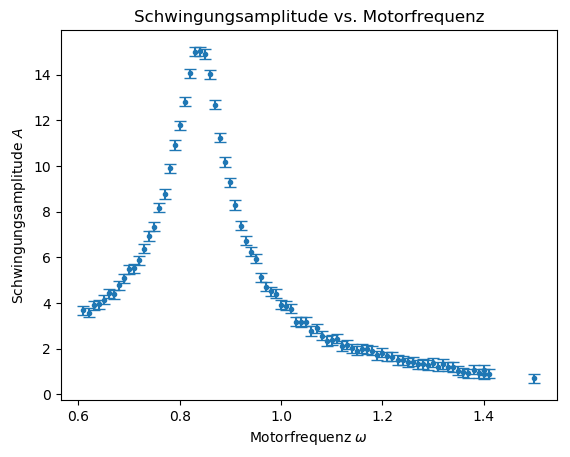

PyObject Text(28,0.5,'Schwingungsamplitude $A$')

In [87]:
errorbar(ω, A, yerr=ΔA, fmt=".")

title("Schwingungsamplitude vs. Motorfrequenz")
xlabel(L"Motorfrequenz $\omega$") # das L vor dem String steht für LaTeX
ylabel(L"Schwingungsamplitude $A$")

# 3. Federkonstante $k$ bestimmen (Automatische Fehlerfortpflanzung)

In [88]:
using Measurements
import Measurements: value, uncertainty

Links: **[Measurements.jl](https://github.com/JuliaPhysics/Measurements.jl)** ([Dokumentation](https://juliaphysics.github.io/Measurements.jl/stable/))

In [89]:
x = measurement(m[1], Δm[1])

1.33 ± 0.05

In [90]:
y = measurement(m[end], Δm[end])

1.37 ± 0.05

In [91]:
x + y

2.7 ± 0.071

In [92]:
x * y

1.822 ± 0.095

In [93]:
z = sqrt(x + y)

1.643 ± 0.022

In [94]:
value(z)

1.6431676725154984

In [95]:
uncertainty(z)

0.02151657414559676

Wir führen nun die Werte und Fehlerinformationen unserer Daten in `Measurements` zusammen.

In [96]:
mass_data = measurement.(m, Δm)

10-element Array{Measurement{Float64},1}:
 1.33 ± 0.05
 1.33 ± 0.05
 1.33 ± 0.05
 1.34 ± 0.05
 1.34 ± 0.05
 1.34 ± 0.05
 1.37 ± 0.05
 1.34 ± 0.05
 1.38 ± 0.05
 1.37 ± 0.05

In [97]:
T_data = measurement.(T, ΔT)

10-element Array{Measurement{Float64},1}:
 7.75 ± 0.05
 7.51 ± 0.05
 7.41 ± 0.05
 7.44 ± 0.05
 7.48 ± 0.05
 7.56 ± 0.05
  7.3 ± 0.05
  7.6 ± 0.05
 7.14 ± 0.05
  7.2 ± 0.05

In [101]:
using Statistics

Links: [Statistics](https://docs.julialang.org/en/latest/stdlib/Statistics/) (Standard Library = Paket das mit Julia ausgeliefert wird (keine Installation notwendig))

In [103]:
mass_mean = mean(mass_data)

1.347 ± 0.016

In [104]:
T_mean = mean(T_data)

7.439 ± 0.016

Aus `mass_mean` und `T_mean` können wir nun die Federkonstante samt Fehler bestimmen.

$T = 2\pi\sqrt{\dfrac{m}{k}} \ \  \Rightarrow \ \ k = \left( \dfrac{2\pi}{T} \right)^2 m$

In [108]:
k_measurement = (2 * pi / T_mean)^2 * mass_mean

0.961 ± 0.012

## 4. Bestimmen von $\gamma$ (Fitten)

Aus der exakten Lösung der Bewegungsgleichung wissen wir, dass die Amplitude die folgende Form besitzt:

$\quad A = \dfrac{F}{\sqrt{m^2 (\frac{k}{m} - \omega^2)^2 + \gamma^2 \omega^2}}$

Bis auf die Dämpfung $\gamma$ kennen wir alle Größen. Wir können diese Relation also an die Daten fitten und $\gamma$ extrahieren.

In [106]:
using LsqFit # LsqFit steht für Least squares fit (Methode der kleinsten Quadrate)

Links: [LsqFit.jl](https://github.com/JuliaNLSolvers/LsqFit.jl)

In [109]:
F = 1.69 # konstante Kraft
m = value(mass_mean)
k = value(k_measurement)

# Model definieren
# p = Parameter des Modells (Array)
function model(ω, p)
    γ = p[1]
    @. F / sqrt(m^2 * (k / m - ω^2)^2 + γ^2 * ω^2)
end

model (generic function with 1 method)

In [110]:
fit = curve_fit(model, ω, A, [0.5])

LsqFit.LsqFitResult{Array{Float64,1},Array{Float64,1},Array{Float64,2},Array{Float64,1}}([0.133724], [-0.0699642, 0.176739, -0.0189726, 0.101773, 0.0654512, -0.0228252, 0.210521, 0.0466439, -0.0115031, -0.106304  …  -0.0514871, 0.0841517, 0.131302, 0.154526, -0.0401, 0.0884876, 0.105986, 0.0774447, -0.0698119, 0.109258], [-0.826164; -0.947968; … ; -0.0918367; -0.0565458], true, Float64[])

In [111]:
# Ermittelte Parameter und dessen Standardfehler auslesen
γ = coef(fit)[1]
println("γ = ", γ)

γ_err = stderror(fit)[1]
println("γ_err = ", γ_err)

γ = 0.13372402632840724
γ_err = 0.0006452932270736695


# 5. Darstellung der Ergebnisse im $\LaTeX$ - Look + Speichern als PDF Datei

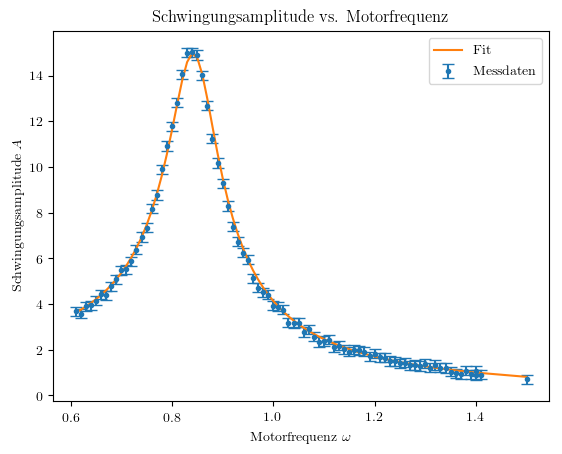

In [112]:
# LaTeX einschalten
rc("text", usetex=true)
rc("font", family="serif")

# Plot
errorbar(ω, A, yerr=ΔA, fmt=".", label="Messdaten")
plot(ω, model(ω, γ), label="Fit")

title("Schwingungsamplitude vs. Motorfrequenz")
xlabel(L"Motorfrequenz $\omega$")
ylabel(L"Schwingungsamplitude $A$")
legend()

#  Als PDF Datei speichern
savefig("Schwingungsamplitude.pdf")

In [ ]:
# Wir verwenden matplotlib

In [ ]:
# LaTeX ausschalten
# rc("text", usetex=false)
# rc("font", family="sans-serif")

# 6. Wo findet man externe Julia Pakete?

Eine Übersicht von Paketen gibt es z.B. unter https://juliaobserver.com/ und https://pkg.julialang.org/docs/.

Viele Pakete sind in sogenannten GitHub Organisationen, z.B. JuliaMath oder JuliaQuantum, zusammengefasst. Diese sind auf https://julialang.org/community/ unter *Julia GitHub Groups* gelistet.

Hilfe und Informationen zu Paketen findet man auf deren Webseiten (auf github). Diese findet man z.B. indem man nach "**Paketname jl**" sucht.

Beispiel DataFrames: https://github.com/JuliaData/DataFrames.jl

In [113]:
@which curve_fit(model, ω, A, [0.5])

curve_fit(model, xdata::AbstractArray, ydata::AbstractArray, p0::AbstractArray) in LsqFit at C:\Users\carsten\.julia\packages\LsqFit\2vmeX\src\curve_fit.jl:104

In [114]:
@edit curve_fit(model, ω, A, [0.5])